### Author : Olufemi Victor Tolulope in GBV Classifiers team.

Competition: Gender-Based Violence Tweet Classification by #ZindiWeekendz

Device used to run this notebook: Google colab, free version.

###### Mount your google drive if your data is located there.

In [1]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Install the Fastai library using pip install. Also upgrade to the latest version.

In [2]:
#!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai --upgrade --quiet

     |████████████████████████████████| 188 kB 9.9 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 


import everything from fastai text library.

In [3]:
from fastai.text.all import *

It's over important to set the seed, so let's just seed everything! I'm using 2021

In [4]:
 def random_seed(seed_value, use_cuda): 
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value) 
# cpu  vars
    random.seed(seed_value)
 # Python 
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# gpu vars
        torch.backends.cudnn.deterministic = True 
 #needed
        torch.backends.cudnn.benchmark = False 
#Remember to use num_workers=0 when creating the DataBunch.

In [5]:
random_seed(2021,True)

Check if cuda is available, you'll be needing your GPU.

In [6]:
torch.cuda.is_available()

True

Now that you're setup, bring in the data from the location on drive.

In [7]:
train = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Test.csv")
ss =   pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/SampleSubmission.csv")

As is right in Fastai Text, using the ULMFIT method, we have to train a language learner, and pull out the encoder from it. 

This should only be done once because it's quite slow,. To do this, we'll need all the data, test + train.

In [8]:
train.tail()

,Tweet_ID,tweet,type
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk on Halloween. I liked him/thought he was taking care of me. He took me to an Airbnb where I thought I’d rest, but he raped me while I was throwing up. Grandma said she warned me not to drink/this is a learning lesson. 🏳️",sexual_violence
39646,ID_ZZXB10M6,"So you’re telling me Emmanuel Macron was groomed, maybe even raped, as a child by a 40 year old woman... who he married, taking her 3 kids and having none of his own? What a worthless existence",sexual_violence
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps – husband tells court -",Physical_violence
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is that him? Me:Yes babe get him he raped me And killed me Police officer boyfriend: you fucking scum! Come HERE!!!,sexual_violence
39649,ID_ZZZ8QEKT,“I will take accountability if you think it’s ok for me to live in a Tenn jail for the rest of my life and get raped and beaten to death” He lays down the guilt a little thick. She should say ok.,sexual_violence


In [9]:
df = train.drop("type", axis=1).append(test, ignore_index = True)

In [10]:
df

,Tweet_ID,tweet
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i work with. Actually a guy i smoked with once at my house but he was doing too much tryna be sexual and it wasn’t even like that for me just wanted to smoke.
1,ID_00395QYM,he thought the word raped means sex and told me “i saw our dogs raping eachother” and i was like wtf
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 MOLESTED HE IN JAIL ON NOTHER CHARGE SO SHE NOT SAYING WORD
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to 7. No one believed me. I was raped by my bro’s friend in a classroom at 13. He was 18. I told no one cause “Who would believe me?”. My bro found out when I was 19. His friend bragged to the wrong person. It is hard to come forward.
4,ID_004F7516,"Chessy Prout can do better by telling the truth. By not selling Owen Labrie out to hide whoever else's DNA was in her underwear. She said ""I have never said he raped me"". That changed Chessy to ""I was raped, I was violated"". White Female Privilege allowed her a platform to lie."
...,...,...
55226,ID_ZZR1D21T,"A Teesside charity has filed a “super complaint” against alleged systemic mishandling of sexual abuse cases by police forces. ⚠️ content warning: honour-based violence, sexual and domestic abuse, forced marriage, and female genital mutilation (FGM)."
55227,ID_ZZSQF54Y,he ... forced me to have sex with him.
55228,ID_ZZTN5126,Female student of medical university raped at gunpoint in Lahore
55229,ID_ZZWS0XZZ,Bokamoso Mpembe (20 months) (Kidnapped and killed by mother’s ex-boyfriend - Aug 2020) Bridgenay Slingers (18) (Murdered by ex-boyfriend) Carol Pienaar (raped and murdered no further details available but case closed) Clarissa Lindor (27) (beaten to death by boyfriend)


Create a datablock API to hadle your data feed into fastai. I used 95 percent to train, and 5 percent for validation, this doesn't really matter, the language model learner should get as much text as possible.

In [11]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('tweet', is_lm=True),
    get_x=ColReader('text'), 
    splitter=TrainTestSplitter(0.05) 
    # using only 5% of entire comments data for validation inorder to learn more
)

Quick one! : To avoid disparities, check your Fastai version, mine is "2.5.0"

In [12]:
import fastai

In [13]:
fastai.__version__

'2.5.0'

proceed to create your data loader.

In [14]:
data_lm = dls_lm.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### You can always comment out this section after running once.

you won't be needing this section everytime you want to run the notebook, if you've run it once and saved the encoder, you can comment the code lines out.

###### Start of temporary section

Build the language learner model

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=True, metrics=[accuracy, Perplexity()])

View model

In [16]:
learn.model

check out a single batch

In [17]:
data_lm.show_batch()

You can use fastai's lr_find to find a suitable learning rate.

In [18]:
learn.lr_find()

For me, I picked 1e-2 as learning rate.

In [19]:
learn.fine_tune(5, 1e-2)

let's save the encoder. This is what we need this section for.

In [20]:
learn.save_encoder('/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/v2ft_enc')

###### End of temporary section.

###### Let's continue the code. 

Re-import the test and train again, we've tampered with it previously. I had some challenges so i changed the column name from tweet to text.

###### Now you'll train the first text classifier model.

In [21]:
_train = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Train.csv")
_test = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Test.csv")

In [22]:
_train = _train.drop("Tweet_ID", axis=1)
_test = _test.drop("Tweet_ID", axis=1)

In [23]:
tweet = _train["tweet"]
_train = _train.drop("tweet", axis=1)
_train["text"] = tweet

In [24]:
tweet = _test["tweet"]
_test = _test.drop("tweet", axis=1)
_test["text"] = tweet

In [25]:
_train.head()

,type,text
0,sexual_violence,Had a dream i got raped last night. By a guy i work with. Actually a guy i smoked with once at my house but he was doing too much tryna be sexual and it wasn’t even like that for me just wanted to smoke.
1,sexual_violence,he thought the word raped means sex and told me “i saw our dogs raping eachother” and i was like wtf
2,sexual_violence,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 MOLESTED HE IN JAIL ON NOTHER CHARGE SO SHE NOT SAYING WORD
3,sexual_violence,I was sexually abused for 3 years at age 4 to 7. No one believed me. I was raped by my bro’s friend in a classroom at 13. He was 18. I told no one cause “Who would believe me?”. My bro found out when I was 19. His friend bragged to the wrong person. It is hard to come forward.
4,sexual_violence,"Chessy Prout can do better by telling the truth. By not selling Owen Labrie out to hide whoever else's DNA was in her underwear. She said ""I have never said he raped me"". That changed Chessy to ""I was raped, I was violated"". White Female Privilege allowed her a platform to lie."


Create your datablock, notice that I used a TrainTestSplitter, this gives me the edge to split by stratification. I used a train of 90% and a 10% test.

In [27]:
blocks = (TextBlock.from_df('text', seq_len=data_lm.seq_len, vocab=data_lm.vocab), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('type'),
                splitter=TrainTestSplitter(0.1, stratify=_train["type"]) )

Create your dataloader.

In [28]:
dls = dls.dataloaders(_train, bs=32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


check out a single batch

In [29]:
dls.show_batch(max_n=3)

,text,category
0,xxbos xxmaj do xxmaj ine ! xxmaj for xxmaj micheal . xxup b. xxup o. xxup k. xxmaj cory . xxmaj is xxmaj my xxmaj home xxmaj xxunk xxmaj at xxmaj job xxmaj corps . xxmaj michael xxmaj be xxmaj is a xxmaj tiger . xxmaj xxunk . xxmaj by . xxmaj me ! xxmaj called . xxmaj xxunk xxmaj veins . a xxmaj boy . xxmaj that xxmaj was . xxmaj raped xxmaj to xxmaj death . xxmaj because . xxmaj he xxmaj was a xxmaj blood ! xxmaj god . xxmaj did xxmaj him xxmaj in . xxmaj he xxmaj said . xxmaj show ! xxmaj me xxmaj god . i xxmaj not ! a xxmaj crack xxmaj head . i xxmaj love . xxmaj lil xxmaj but . xxunk .,sexual_violence
1,"xxbos xxup this xxup are xxup truly xxup fraud xxup tell xxup me xxup when xxup he xxup destroy xxup jammu xxup you xxup are a xxup hindu xxup you xxup should xxup know xxup the xxup pain xxup of xxup xxunk xxup hindu xxup who xxup xxunk xxup and xxup raped xxup by xxup muslims .. xxup ok xxup you xxup will xxup not xxup listen xxup to xxup me xxup when xxup your xxup child xxup will xxup be xxup get xxup raped xxup by xxup muslims xxup then xxup you xxup will xxup xxunk xxup bjp = anti - muslim , anti - xxunk",sexual_violence
2,"xxbos and the fucking fact he is not castrated ? ? ! ? ! ? ! ! ? ? he fucking xxup raped xxup an 8 xxup year xxup old xxup child xxup in 2008 , xxup she xxup was 8 xxup years xxup old xxup she 's xxup the xxup same xxup age xxup as xxup me xxup and xxup this xxup trash xxup is xxup out xxup of xxup the xxup prison xxup even xxup though xxup the xxup counselors xxup and xxup all xxup said xxup he xxup has xxup no xxup sign xxup of xxup remorse",sexual_violence


check size of train and validation

In [30]:
len(dls.train_ds), len(dls.valid_ds)

(35685, 3965)

Create your AWD_LSTM learner taking advantage of Fastai's open source pretrained model, the wikitext103, Fastai has already set pretrained=True.

Very importantly, I loaded in the encoder which i saved earlier from the language learner model.

In [31]:
learn = text_classifier_learner(dls, AWD_LSTM,metrics=[accuracy])
learn.load_encoder('/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/v2ft_enc')

Check out lr_find to choose a suitable learning rate.

SuggestedLRs(valley=0.0063095735386013985)

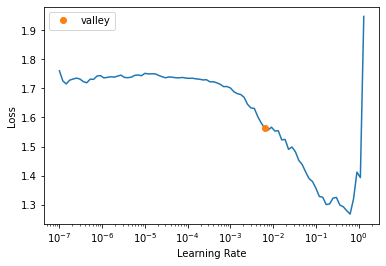

In [32]:
learn.lr_find()

Choose learning rate, for me, I used 1e-2, looks good from the plot above.

In [33]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.124705,0.047326,0.986381,00:59
1,0.064934,0.027379,0.992182,00:58


 use a slice of learning rates to tune the inner layers of the model.

In [34]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.016762,0.004638,0.998235,01:02


In [35]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4), 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.010837,0.002720,0.999496,01:22


Now that you are done training, load in the test set, and make your predictions.

In [36]:
dl = learn.dls.test_dl(_test['text'])
class_list = ['Harmful_Traditional_practice', 'Physical_violence', 'economic_violence','emotional_violence', 'sexual_violence']
preds= learn.get_preds(dl=dl)
class_indexes = np.argmax(preds[0], axis=1)
classes = [class_list[idx] for idx in class_indexes]

##### This is where the Magic is!

Generate psuedo labels for your model to train with. I picked a specific class, "Physical_violence"

In [37]:
_psuedo =  pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Test.csv")
_psuedo["type"]  = classes

Pull out physical_violence from your result. These are the pseudo labels you need.

In [38]:
_psuedo = _psuedo[_psuedo["type"]=="Physical_violence"]

###### Stressful but worthwhile! Start the whole process all over again

Load in the train and test set.

In [39]:
_train = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Train.csv")
_test = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/Test.csv")

add the pseudo labels to the training set.

In [40]:
_train = _train.append(_psuedo)

same stuff we did earlier, replace column name tweet with text. 

Note: There are much more better ways to do this, but most times in an hackathon, your head is hot, especially when other folks are climbling up the leaderboard incredibly fast!

In [41]:
_train = _train.drop("Tweet_ID", axis=1)
_test = _test.drop("Tweet_ID", axis=1)
tweet = _train["tweet"]
_train = _train.drop("tweet", axis=1)
_train["text"] = tweet
tweet = _test["tweet"]
_test = _test.drop("tweet", axis=1)
_test["text"] = tweet

Use Fastai's datablock API to create your datablock. Once again, notice my stratify! it's really important. 

Train set is 90%, Test set is 10%.

In [42]:
blocks = (TextBlock.from_df('text', seq_len=data_lm.seq_len, vocab=data_lm.vocab), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('type'),
                splitter=TrainTestSplitter(0.1, stratify=_train["type"]) )

Use your dataloader to create the dataset.

In [43]:
dls = dls.dataloaders(_train, bs=32) # i used batchsize of 32

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


check batch.

In [44]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxup language xxup are ( i xxup gon na xxup take xxup him xxup home xxup and xxup sit xxup on xxup him ) , xxup am xxup other xxup one i xxup ve xxup seen xxup what xxup am xxup going xxup to xxup do ) xxup doing xxup people xxup means xxup mess xxup there xxup life xxup up ( xxup tupac xxup said xxup y' all xxup do xxup me xxup and i xxup fuck xxup y' all ) i xxup think xxup the xxup girl xxup he xxup raped xxup did xxup him xxup and xxup wo nt xxup fuck xxup him . i xxup always xxup tell xxup the xxup people xxup trying xxup to xxup do xxup me xxup that "" -i",sexual_violence
1,"xxbos xxup why ? xxup you xxup do n't xxup like xxup him , our xxup her , ? xxup he xxup our xxup she xxup do n't xxup fit xxup in xxup your xxup perfect xxup world , your xxup moral xxup world , xxup was xxup you xxup hurt xxup by a xxup black xxup man , did xxup you xxup get xxup raped xxup by a xxup black xxup man , xxup beat xxup by a xxup black xxup man , xxup why xxup would xxup you xxup want xxup to xxup take xxup down a xxup black xxup man , xxrep 4 ? xxup tel xxup me xxup how xxup far xxup will xxup you xxup go xxup to xxup take",sexual_violence
2,xxbos xxup it 's xxup funny xxup because xxup he xxup is xxup blank xxup man xxup haha xxup do n't xxup cancel xxup me xxup or xxup i 'll xxup tell xxup my xxup mommy xxup that xxup got xxup raped xxup by xxup mark xxup xxunk ( that xxup follows xxup me xxup on xxup twitter xxup by xxup the xxup way xxup and xxup has xxup hit xxup that xxup xxunk xxup bell xxup because xxup she xxup supports xxup satire . ) xxup that xxup you xxup made xxup fun xxup of xxup me xxup and xxup you 're xxup going xxup to xxup get xxup grounded xxup when i xxup become .,sexual_violence


Same as you've done earlier! use the AWD_LSTM.

In [45]:
learn = text_classifier_learner(dls, AWD_LSTM,metrics=[accuracy])
learn.load_encoder('/content/drive/MyDrive/machine_learning_stories/Weekendz/GBV/v2ft_enc')

Check for a suitable learning rate, by now, we both agree 1e-2 is a good one.

SuggestedLRs(valley=0.004365158267319202)

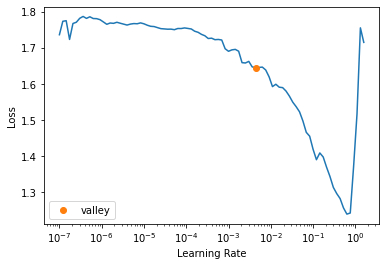

In [46]:
learn.lr_find()

###### Train your new model.

In [47]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.109457,0.044894,0.985923,01:00
1,0.079323,0.038483,0.988185,00:59


In [48]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.020496,0.002653,0.999497,01:03


In [49]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4), 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.014115,0.001885,0.999749,01:23


In [50]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(5e-3/(2.6**4), 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.009319,0.002048,0.999246,01:46
1,0.010859,0.001532,0.999497,01:46
2,0.012647,0.005592,0.997486,01:46
3,0.005462,0.000943,1.000000,01:47
4,0.002202,0.000827,0.999497,01:47


Yeah! I know, your local accuracy is in 99.9%, your valid loss has a consistent down flow, you are not overfitting.

Create the test data loader, then make your predictions.

In [52]:
dl = learn.dls.test_dl(_test['text'])

In [53]:
preds= learn.get_preds(dl=dl)

check out few things........

In [54]:
preds[0].shape

torch.Size([15581, 5])

In [55]:
preds#[0][0] # The predictions for the first test.

(tensor([[1.3233e-04, 4.4120e-02, 3.3379e-04, 1.9565e-02, 9.3585e-01],
         [1.0000e+00, 7.1751e-08, 1.2142e-09, 3.6495e-09, 2.4452e-07],
         [1.0000e+00, 8.2652e-09, 3.8545e-10, 5.6193e-10, 1.0170e-08],
         ...,
         [5.1628e-04, 1.1168e-06, 1.8016e-07, 1.1544e-07, 9.9948e-01],
         [2.1977e-08, 1.2267e-06, 4.1447e-09, 1.9229e-08, 1.0000e+00],
         [2.5805e-05, 5.2499e-04, 7.1031e-06, 5.8554e-05, 9.9938e-01]]), None)

This is your class list in words, use this to convert predictions back to words

In [59]:
class_list = ['Harmful_Traditional_practice', 'Physical_violence', 'economic_violence','emotional_violence', 'sexual_violence']

Convert predictions to words, view first 3

In [60]:
class_indexes = np.argmax(preds[0], axis=1)
classes = [class_list[idx] for idx in class_indexes]
classes[:3] # We've found the classes in words

['sexual_violence',
 'Harmful_Traditional_practice',
 'Harmful_Traditional_practice']

use your learner to show results under the hood, for your perusal.

In [61]:
learn.show_results()

,text,category,category_
0,xxbos xxmaj do xxmaj ine ! xxmaj for xxmaj micheal . xxup b. xxup o. xxup k. xxmaj cory . xxmaj is xxmaj my xxmaj home xxmaj xxunk xxmaj at xxmaj job xxmaj corps . xxmaj michael xxmaj be xxmaj is a xxmaj tiger . xxmaj xxunk . xxmaj by . xxmaj me ! xxmaj called . xxmaj xxunk xxmaj veins . a xxmaj boy . xxmaj that xxmaj was . xxmaj raped xxmaj to xxmaj death . xxmaj because . xxmaj he xxmaj was a xxmaj blood ! xxmaj god . xxmaj did xxmaj him xxmaj in . xxmaj he xxmaj said . xxmaj show ! xxmaj me xxmaj god . i xxmaj not ! a xxmaj crack xxmaj head . i xxmaj love . xxmaj lil xxmaj but . xxunk .,sexual_violence,sexual_violence
1,"xxbos xxup victims xxup survivors xxup of xxup xxunk xxup maxwell , xxup she xxup did xxup not xxup help xxup you xxup and xxup she xxup is xxup the xxup xxunk xxup rapist ! xxup she xxup raped xxup me xxup since i xxup was a xxup little xxup girl xxup under 10 xxup years xxup old xxup then i a xxup teenager xxup she xxup yelled xxup to xxup her xxup husband xxup jeffrey xxup xxunk ( her xxup name xxup as xxup andrea xxup xxunk ) xxup rape xxup her xxup jeffrey ! xxup he xxup raped xxup me xxup in xxup the xxup shower !",sexual_violence,sexual_violence
2,xxbos xxmaj this creature ( he is not a man or a male to me ) tried to get with an 11 xxup year xxup old . xxup this xxup creature xxup is 20 xxup years xxup old . xxup he xxup raped xxup girls . xxup he xxup would xxup threaten xxup to xxup expose xxup them xxup to xxup their xxup friends xxup if xxup they xxup do nt xxup suck xxup his xxup dick . xxup one xxup victim xxup had xxup to xxup leave xxup the xxup country xxup and xxup live xxup on xxup her xxup own xxup without a xxup family,sexual_violence,sexual_violence
3,xxbos xxup tw / / xxup rape xxup he xxup raped xxup an xxup underage xxup girl 2 xxup years xxup ago xxup two xxup fucking xxup months xxup after xxup he xxup tried xxup asking xxup me xxup out xxup and i xxup rejected xxup him xxup and i xxup was xxup also xxup underage i xxup fucking xxup hate xxup it xxup here xxup so xxup much xxup like i xxup can xxup not xxup explain xxup how xxup fucking xxup scary xxup this xxup situation xxup is xxup for xxup me xxup like xxup that xxup could xxup have xxup been xxup me,sexual_violence,sexual_violence
4,xxbos me : then xxup how xxup tf xxup he xxup know xxup that 's xxup his xxup baby xxup paris xxmaj mamas : xxunk stop yelling at me me : naw xxup fuck xxup that xxup uu a xxup hoe xxup ass xxup butch xxup and xxup uu xxup saying xxup uu xxup got xxup raped xxup uu xxup probably xxup liked xxup that xxup shit xxmaj mamas : 😨 … 😌 … 🙂 get out xxmaj me : mamas ii did n't mean to say that i m so sorry xxmaj mamas : xxunk xxmaj me : no xxunk mamas : get xxup out,sexual_violence,sexual_violence
5,xxbos xxup well i xxup know xxup from xxup my xxup own xxup experiences xxup with xxup men xxup that xxup as xxup soon xxup as xxup he xxup opens xxup his xxup mouth xxup he s xxup lying xxup if a xxup woman xxup came xxup to xxup me & & xxup said xxup my xxup best xxup male xxup friend xxup had xxup raped xxup her i xxup would xxup believe xxup the xxup woman xxup not xxup my xxup friend xxup denying xxup it xxup years xxup of xxup experience xxup taught xxup me xxup this xxup truth,sexual_violence,sexual_violence
6,xxbos xxup this xxup guy xxup xxunk xxup xxunk xxup owes xxup me xxup money xxup for xxup movie xxup roles i xxup sold xxup him . xxup he xxup owes 27 xxup needles xxup to xxup my xxup head xxup deadly xxup rape xxup alot xxup of xxup times . xxup same xxup with xxup miguel xxup xxunk n xxup he 's xxup family xxup now i xxup was xxup raped xxup sexually xxup by xxup over 15 xxup different xxup police xxup departments xxup including xxup judges xxup prosecutors xxup state xxup police xxup four xxup fbi xxup a.,sexual_violence,sexual_violence
7,"xxbos xxmaj he is also a rapist , and went on xxmaj epsteins xxmaj island . xxup he xxup raped 3 xxup underage xxup boys xxup and x

Take a quick glance at unique classes in your solution.

In [62]:
np.unique(classes)

array(['Harmful_Traditional_practice', 'Physical_violence',
       'economic_violence', 'emotional_violence', 'sexual_violence'],
      dtype='<U28')

###### Make your submission while smiling.

Use sample submission.

In [63]:
ss['type'] = classes
ss.head() # Now we have outputs that aren't restricted to the integer growth phase numbers

,Tweet_ID,type
0,ID_0095QL4S,sexual_violence
1,ID_00DREW5O,Harmful_Traditional_practice
2,ID_00E9F5X9,Harmful_Traditional_practice
3,ID_00G9OSKZ,sexual_violence
4,ID_00HU96U6,Physical_violence


This is very important, Take a quick glance at the stratification of your result. It's good practice, you might find something.

In [64]:
ss.type.value_counts()

sexual_violence                 8069
Physical_violence               3279
Harmful_Traditional_practice    3160
emotional_violence               619
economic_violence                454
Name: type, dtype: int64

Convert your submission to CSV, download it, then submit on zindi!

In [65]:
name = "submission.csv"
ss.to_csv(name, index=False)
from google.colab import files
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>